# Individual geoms
## Basic plot types

all accept arguments `color` and `size`, and `fill` for filled geoms

- `geom_area()` draws an area plot, which is a line plot filled to the y-axis (filled lines). Multiple groups will be stacked on top of each other
- `geom_bar(stat = "identity")` makes a bar chart. `stat = "identity"` will leave the data unchanged, otherwise data is counted. Multiple bars in the same location will be stacked on top of one another.
- `geom_line()` connects points from left to right. Accept `linetype` arguments
    - `linetype="solid"`
    - `linetype="dotted"`
    - `linetype="dashed"`
- `geom_path()` connects points in the order they appear in the data. Accept `linetype` arguments
- `geom_point()` produces a scatterplot. Accept `shape` arguments
- `geom_polygon()` draws polygons
- `geom_rect()`, `geom_tile()` and `geom_raster()` draw rectangles
    - `geom_rect()`: require four corners of the rectangle, `xmin`, `ymin`, `xmax` and `ymax`
    - `geom_tile()`: require the center of the rectangle and its size, `x`, `y`, `width` and `height`
    - `geom_raster()`: is a fast special case of `geom_tile()` used when all the tiles are the same size.

In [1]:
library(ggplot2)
library(repr)
options(repr.plot.width=6, repr.plot.height=2)

# multiplot function from Cookbook for R by Winston Chang
# http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
multiplot <- function(..., plotlist=NULL, file, ncol=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'ncol' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of column
    layout <- matrix(seq(1, ncol * ceiling(numPlots/ncol)),
                    ncol = ncol, nrow = ceiling(numPlots/ncol))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
df <- data.frame(
  x = c(3, 1, 5), 
  y = c(2, 4, 20), 
  label = c("a","b","c")
)
p <- ggplot(df, aes(x, y, label = label)) + 
  labs(x = NULL, y = NULL) + # Hide axis label
  theme(plot.title = element_text(size = 10)) # Shrink plot title

`theme()` can custom the component of a figure, see documentation, there's a lot

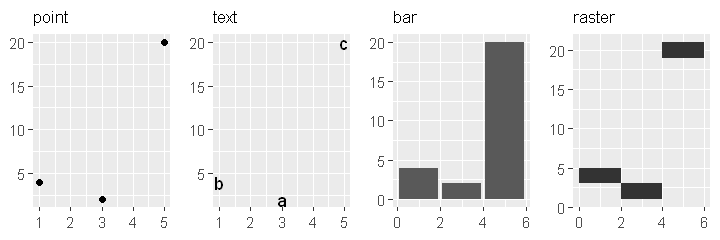

In [3]:
plot1 <- p + geom_point() + ggtitle("point")
plot2 <- p + geom_text() + ggtitle("text")
plot3 <- p + geom_bar(stat = "identity") + ggtitle("bar")
plot4 <- p + geom_tile() + ggtitle("raster")

multiplot(plot1, plot2, plot3, plot4, ncol=4)

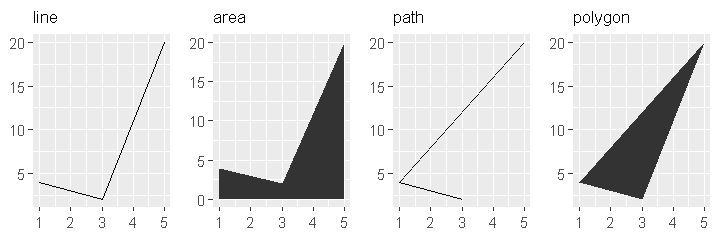

In [4]:
plot1 <- p + geom_line() + ggtitle("line")
plot2 <- p + geom_area() + ggtitle("area")
plot3 <- p + geom_path() + ggtitle("path")
plot4 <- p + geom_polygon() + ggtitle("polygon")

multiplot(plot1, plot2, plot3, plot4, ncol=4)